In [1]:
library(ggplot2)    # For charts

# Read the dataset
cepagri_columns <- c("Time", "Temperature", "Wind", "Humidity", "Apparent Temperature")
cepagri <- read.csv("cepagri.csv", header = FALSE, sep = ";", col.names = cepagri_columns, stringsAsFactors = F)

# Parse each column
cepagri$Time <- as.POSIXlt(strptime(cepagri$Time, "%d/%m/%Y-%H:%M", tz = 'America/Sao_Paulo'))
cepagri$Temperature <- as.numeric(cepagri$Temperature)
cepagri$Wind <- as.numeric(cepagri$Wind)
cepagri$Humidity <- as.numeric(cepagri$Humidity)
cepagri$Apparent.Temperature <- as.numeric(cepagri$Apparent.Temperature)

# I just care about 2015-2017
cepagri <- cepagri[ is.element(cepagri$Time$year, 115:117), ]

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

# Daylight saving time

I noticed that timestamps are formatted using local time, which can be problematic when DST starts or ends. E.g., The time interval 23:00-23:59 happens twice in the last day of DST!

Let's check it out

In [2]:
time_window <- function(dataframe, from, to) {
    dataframe[
        dataframe$Time >= strptime(from, "%d/%m/%Y-%H:%M", tz = 'America/Sao_Paulo') & dataframe$Time <= strptime(to, "%d/%m/%Y-%H:%M", tz = 'America/Sao_Paulo'), 
    ]
}

time_window(cepagri, "21/02/2015-22:50", "22/02/2015-00:10")
time_window(cepagri, "17/10/2015-23:50", "18/10/2015-02:10")
time_window(cepagri, "20/02/2016-22:50", "21/02/2016-00:10")
time_window(cepagri, "15/10/2016-23:50", "16/10/2016-02:10")
time_window(cepagri, "18/02/2017-22:50", "19/02/2017-00:10")
time_window(cepagri, "20/10/2017-23:50", "21/10/2017-02:10")

,Time,Temperature,Wind,Humidity,Apparent.Temperature
49453,2015-02-21 22:50:00,24.0,49.1,81.2,22.9
49454,2015-02-21 23:00:00,23.8,45.4,82.6,22.6
49455,2015-02-21 23:10:00,23.6,50.7,83.4,22.5
49456,2015-02-21 23:20:00,23.5,58.2,83.4,22.4
49457,2015-02-21 23:30:00,23.3,56.9,84.0,22.2
49458,2015-02-21 23:40:00,23.4,66.1,82.7,22.3
49459,2015-02-21 23:50:00,23.3,65.5,82.5,22.2
49460,2015-02-21 23:00:00,23.1,56.7,82.9,22.0
49461,2015-02-21 23:10:00,NA,NA,NA,NA
49462,2015-02-21 23:20:00,NA,NA,NA,NA


,Time,Temperature,Wind,Humidity,Apparent.Temperature
83380,2015-10-17 23:50:00,18.8,86.6,70.3,17.4
83381,2015-10-18 01:00:00,18.7,87.7,70.5,17.3
83382,2015-10-18 01:10:00,NA,NA,NA,NA
83383,2015-10-18 01:20:00,NA,NA,NA,NA
83384,2015-10-18 01:30:00,NA,NA,NA,NA
83385,2015-10-18 01:40:00,NA,NA,NA,NA
83386,2015-10-18 01:50:00,NA,NA,NA,NA
83387,2015-10-18 02:00:00,NA,NA,NA,NA
83388,2015-10-18 02:10:00,NA,NA,NA,NA


,Time,Temperature,Wind,Humidity,Apparent.Temperature
101073,2016-02-20 22:50:00,25.1,7.8,81.7,24.0
101074,2016-02-20 23:00:00,25.1,7.8,81.7,24.0
101075,2016-02-20 23:10:00,23.6,20.3,90.2,22.5
101076,2016-02-20 23:20:00,23.0,28.8,92.1,21.9
101077,2016-02-20 23:30:00,22.5,25.9,93.5,21.4
101078,2016-02-20 23:40:00,22.4,27.1,96.0,21.3
101079,2016-02-20 23:50:00,21.8,26.4,96.5,20.7
101080,2016-02-20 23:00:00,21.4,24.7,96.0,20.3
101081,2016-02-20 23:10:00,NA,NA,NA,NA
101082,2016-02-20 23:20:00,NA,NA,NA,NA


,Time,Temperature,Wind,Humidity,Apparent.Temperature
135205,2016-10-15 23:50:00,20.7,27.5,86.8,14.3
135206,2016-10-16 01:00:00,20.6,29.7,86.5,13.8
135207,2016-10-16 01:10:00,NA,NA,NA,NA
135208,2016-10-16 01:20:00,20.2,26.3,89.2,19.0
135209,2016-10-16 01:30:00,20.2,25.6,89.0,19.0
135210,2016-10-16 01:40:00,20.3,25.8,89.1,19.1
135211,2016-10-16 01:50:00,20.2,22.0,89.2,19.0
135212,2016-10-16 02:00:00,20.2,25.3,89.7,19.0
135213,2016-10-16 02:10:00,20.4,27.6,89.2,19.2


,Time,Temperature,Wind,Humidity,Apparent.Temperature
152920,2017-02-18 22:50:00,26.2,16.0,67.9,25.0
152921,2017-02-18 23:00:00,26.1,15.6,68.4,24.9
152922,2017-02-18 23:10:00,25.8,9.3,69.8,24.6
152923,2017-02-18 23:20:00,24.9,13.8,74.7,23.7
152924,2017-02-18 23:30:00,24.6,14.8,76.4,23.4
152925,2017-02-18 23:40:00,24.3,14.5,78.5,23.2
152926,2017-02-18 23:50:00,24.3,10.5,77.9,23.2
152927,2017-02-18 23:00:00,24.5,10.2,77.0,23.4
152928,2017-02-18 23:10:00,NA,NA,NA,NA
152929,2017-02-18 23:20:00,NA,NA,NA,NA


,Time,Temperature,Wind,Humidity,Apparent.Temperature
187846,2017-10-20 23:50:00,21.1,43.0,67.0,19.9
187847,2017-10-21 00:00:00,21.0,47.1,67.2,19.8
187848,2017-10-21 00:10:00,20.8,45.1,68.7,19.6
187849,2017-10-21 00:20:00,20.7,53.8,69.9,19.4
187850,2017-10-21 00:30:00,20.5,47.1,71.1,19.3
187851,2017-10-21 00:40:00,20.3,41.8,72.3,19.1
187852,2017-10-21 00:50:00,20.2,45.6,72.8,19.0
187853,2017-10-21 01:00:00,20.4,51.4,71.8,19.1
187854,2017-10-21 01:10:00,20.3,45.4,71.9,19.1
187855,2017-10-21 01:20:00,20.4,45.9,71.6,19.1


As we can see on the tables above, we get sensor errors almost every time DST is toggled.

IMHO, while timezones are hard and DST makes them even harder, this kind of problem feels a bit ridiculous...

As for the ambiguous timestamps, we can fix them by adding 1h whenever we detected that we moved back in time compared with the previous row.

In [6]:
fix.dst <- function(time) {
    for (i in 2:length(time)) {
        if (time[i] + 1800 < time[i - 1]) {
            time[i] <- time[i] + 3600
        }
    }
    time
}
cepagri$Time <- fix.dst(cepagri$Time)

# Data cleanup

DST was an interesting analysis, but since it causes invalid data, it had to be performed before cleaning up the dataset.

Now on, we will just drop all rows with errors.

In [7]:
# Delete lines with invalid elements
cepagri <- cepagri[!apply(cepagri, 1, function(x) {any(is.na(x))}), ]

And we will remove duplicated rows, keeping only the first occurence.

In [8]:
# Remove repeated rows
is.repeated.row <- function(df) {
    ret <- logical(nrow(df))
    for (i in 2:nrow(df)) {
        ret[i] <- all(df[i, ] == df[i-1, ])
    }
    ret
}
cepagri <- cepagri[!is.repeated.row(cepagri[2:5]), ]

# Data distributions

Warning message:
“Removed 7204 rows containing non-finite values (stat_density).”

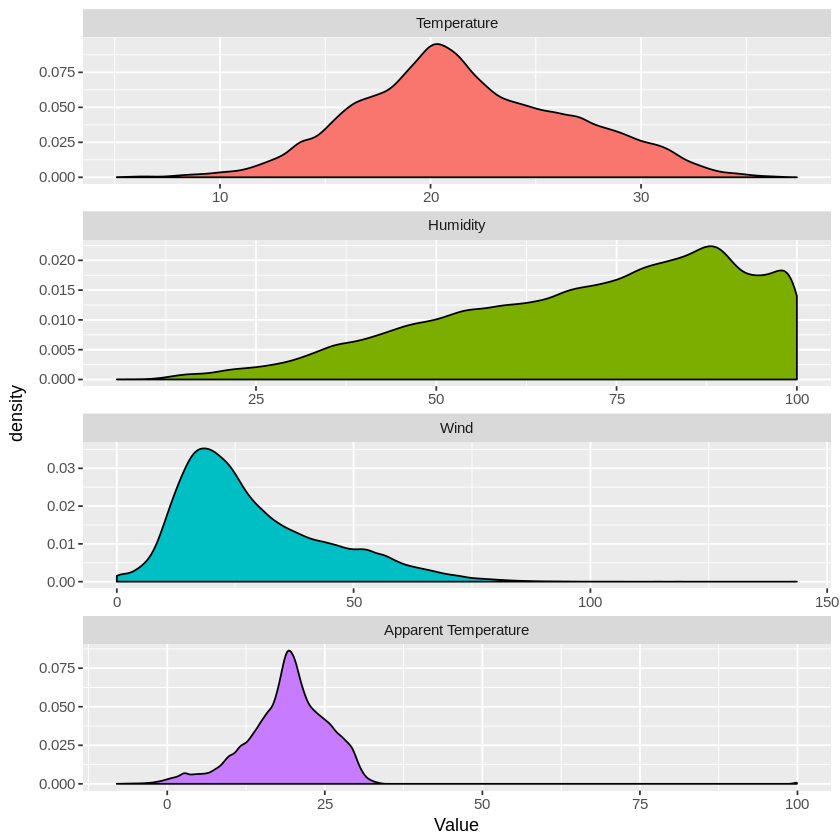

In [3]:
field_values <- rbind(
    data.frame(Attribute = 'Temperature',          Value = cepagri$Temperature),
    data.frame(Attribute = 'Humidity',             Value = cepagri$Humidity),
    data.frame(Attribute = 'Wind',                 Value = cepagri$Wind),
    data.frame(Attribute = 'Apparent Temperature', Value = cepagri$Apparent.Temperature)
)

# I was going to use a plain old geom_density() chart...
p <- ggplot(field_values, aes(x = Value, fill = Attribute))
p <- p + facet_wrap(~ Attribute, scales = "free", ncol=1)
p <- p + geom_density()
p <- p + theme(legend.position="none")
p

# But XKCD taught me the awesomeness of violin charts: https://m.xkcd.com/1967/
#p <- ggplot(field_values, aes(y = Value, x = Attribute, fill = Attribute))
#p <- p + facet_wrap(~Attribute, scales = "free", ncol=4)
#p <- p + geom_violin()
#p <- p + geom_boxplot(width=0.1)
#p <- p + theme(legend.position="none")
#p


Both _Temperature_ and _Humidity_ seems to be well-behaved distributions and are within expected ranges, but _Wind_ and _Apparent Temperature_ have very large outliers that require further investigation.

## Apparent Temperature outliers

This is a sample of the days where the _Apparent Temperature_ reached above 40ºC

In [3]:
apparent.temperature.outliers <- cepagri[cepagri$Apparent.Temperature > 40, ]

# Show some of the outliers (Sampled 1 out of every 5 outliers)
apparent.temperature.outliers[seq(1, nrow(apparent.temperature.outliers), 5), ]

,Time,Temperature,Wind,Humidity,Apparent.Temperature
114706,2016-05-26 07:10:00,13.8,16.9,94.5,99.9
115426,2016-05-31 07:10:00,15.7,15.5,100.0,99.9
116136,2016-06-05 07:10:00,18.5,13.8,100.0,99.9
116856,2016-06-10 07:10:00,6.4,11.7,97.6,99.9
117576,2016-06-15 07:10:00,9.9,16.3,91.9,99.9
118296,2016-06-20 07:10:00,12.2,38.4,98.4,99.9
119016,2016-06-25 07:10:00,12.6,51.9,94.0,99.9
119736,2016-06-30 07:10:00,14.2,27.5,82.4,99.9
120456,2016-07-05 07:10:00,13.6,6.4,82.6,99.9
121175,2016-07-10 07:10:00,12.9,21.9,77.2,99.9


Isn't it awesome that all the outliers are 99.9ºC, exactly at 7:10, every day between May and October 2016? 😂

I wonder whenever it came from an actual error during the data collection, or if it's something that was added just for the students to find.

We could probably recalculate the correct _Apparent Temperature_ from the other fields and fill these gaps (as the other fields seem to be unnafected by the problem) but, to be on the safe side, let's just delete them from further analysis.

In [4]:
cepagri <- cepagri[cepagri$Apparent.Temperature != 99.9, ]

## Wind outliers

Let's inspect the days where wind speed was over 100 km/h:

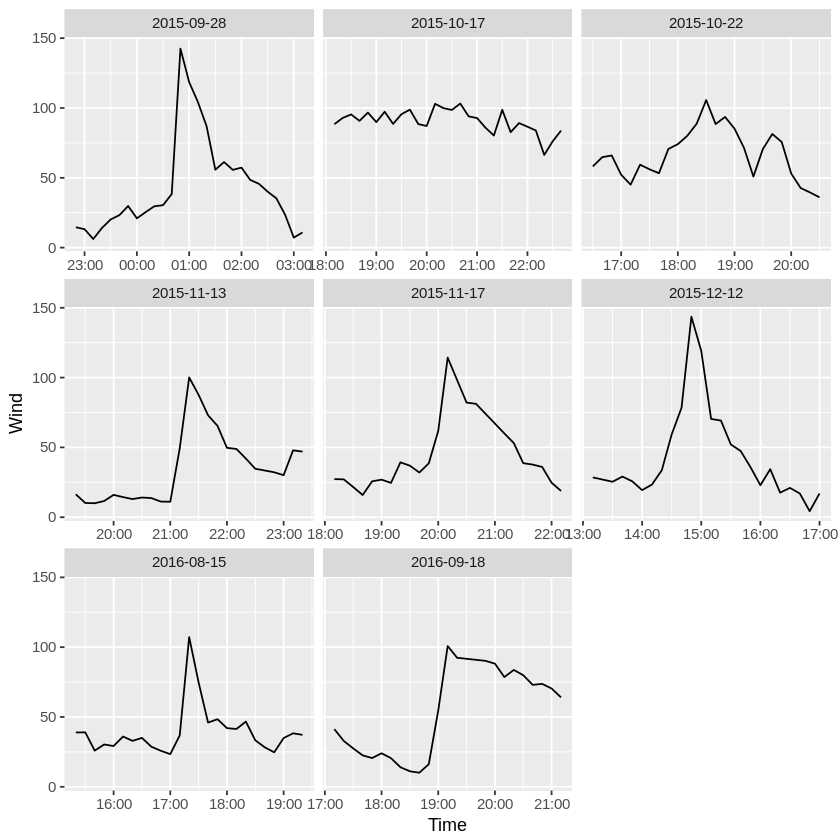

In [5]:
wind.outliers <- cepagri[cepagri$Wind > 100, ]
wind.outliers.window <- 7200  # 2 hours
wind.outliers.date_ranges <- data.frame(min=wind.outliers$Time - wind.outliers.window, max=wind.outliers$Time + wind.outliers.window)
wind.outliers.expanded <- cepagri[sapply(as.POSIXct(cepagri$Time), function(x) {any(x >= wind.outliers.date_ranges$min & x <= wind.outliers.date_ranges$max)}), ]
wind.outliers.expanded$group <- NA

# Split each high-wind day into a separate group
wind.outliers.expanded$Group[1] <- 1
for (i in 2:nrow(wind.outliers.expanded)) {
    if (wind.outliers.expanded$Time[i] > 2*wind.outliers.window + wind.outliers.expanded$Time[i - 1]) {
        wind.outliers.expanded$Group[i] <- wind.outliers.expanded$Group[i-1] + 1
    } else {
        wind.outliers.expanded$Group[i] <- wind.outliers.expanded$Group[i-1]
    }
}

wind.outliers.group.time <- aggregate(as.POSIXct(wind.outliers.expanded$Time), list(Group = wind.outliers.expanded$Group), median)$x
wind.outliers.expanded$GroupTime <- wind.outliers.group.time[ wind.outliers.expanded$Group ]

p <- ggplot(wind.outliers.expanded, aes(y = Wind, x = Time, fill = as.factor(Group)))
p <- p + facet_wrap( ~ strftime(GroupTime, "%Y-%m-%d"), scales = "free_x")
p <- p + geom_line()
p <- p + theme(legend.position="none")
p

From the looks of it, seems like those were just __really__ windy days and the data is OK.

I must admit I expected the microexplosion from 2016-06-05 to be one of the outliers -- After all, it destroyed my neighbourhood, many other areas of the city and [made into the news](http://g1.globo.com/sp/campinas-regiao/noticia/2016/06/entenda-o-que-e-microexplosao-que-atingiu-campinas-veja-trajetoria-dela.html), supposedly with 120km/h winds. Let's check it out.

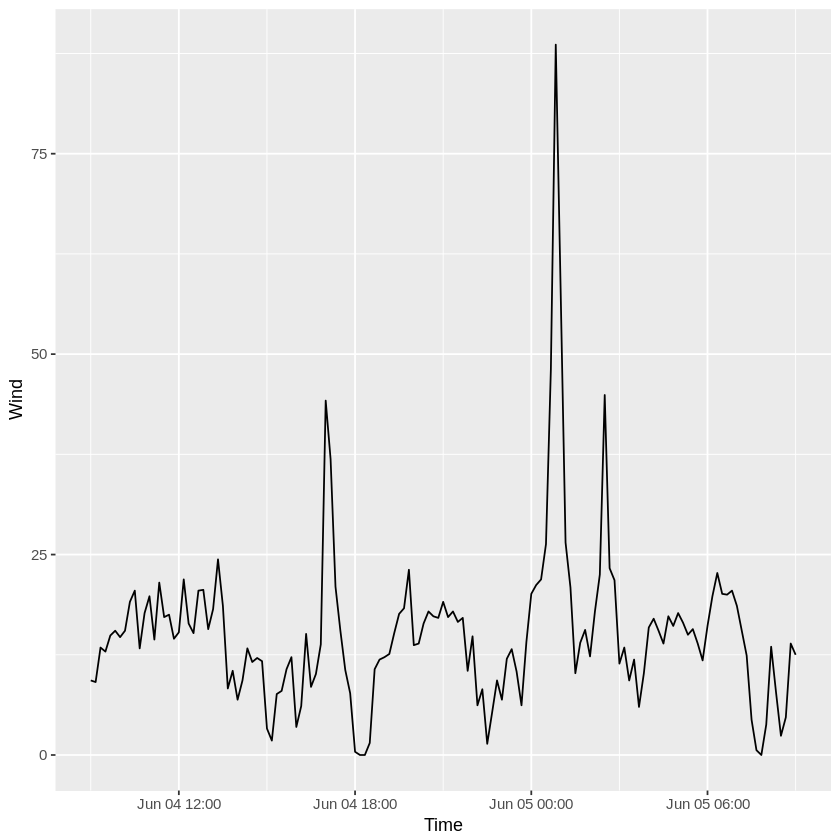

In [198]:
cepagri.microexplosion <- cepagri[cepagri$Time >= strptime("2016-06-04 12:00", "%Y-%m-%d %H:%M") & cepagri$Time <= strptime("2016-06-05 12:00", "%Y-%m-%d %H:%M"), ]

p <- ggplot(cepagri.microexplosion, aes(y = Wind, x = Time))
p <- p + geom_line()
p <- p + theme(legend.position="none")
p

So, turns out that it was really was very windy (~88 km/h), but it didn't make into the 100km/h threshold I've set before.

This probably happened because the place were the measurements were taken was less affected by the storm.

# Correlations

Let's visualize how Temperature, Wind and Humidity correlate with each other

In [204]:
correlation.attributes <- c('Temperature', 'Wind', 'Humidity', 'Apparent.Temperature')

correlation.matrix <- matrix(ncol=length(correlation.attributes), nrow=length(correlation.attributes), dimnames=list(correlation.attributes, correlation.attributes))
for (i in 1:length(correlation.attributes)) {
    for (j in 1:length(correlation.attributes)) {
        correlation.matrix[i,j] <- cor(cepagri[[correlation.attributes[i]]], cepagri[[correlation.attributes[j]]])
    }
}
correlation.matrix

,Temperature,Wind,Humidity,Apparent.Temperature
Temperature,1.0000000,-0.164425429,-0.623340798,0.9031287
Wind,-0.1644254,1.000000000,0.003857735,-0.2673583
Humidity,-0.6233408,0.003857735,1.000000000,-0.4644795
Apparent.Temperature,0.9031287,-0.267358278,-0.464479529,1.0000000


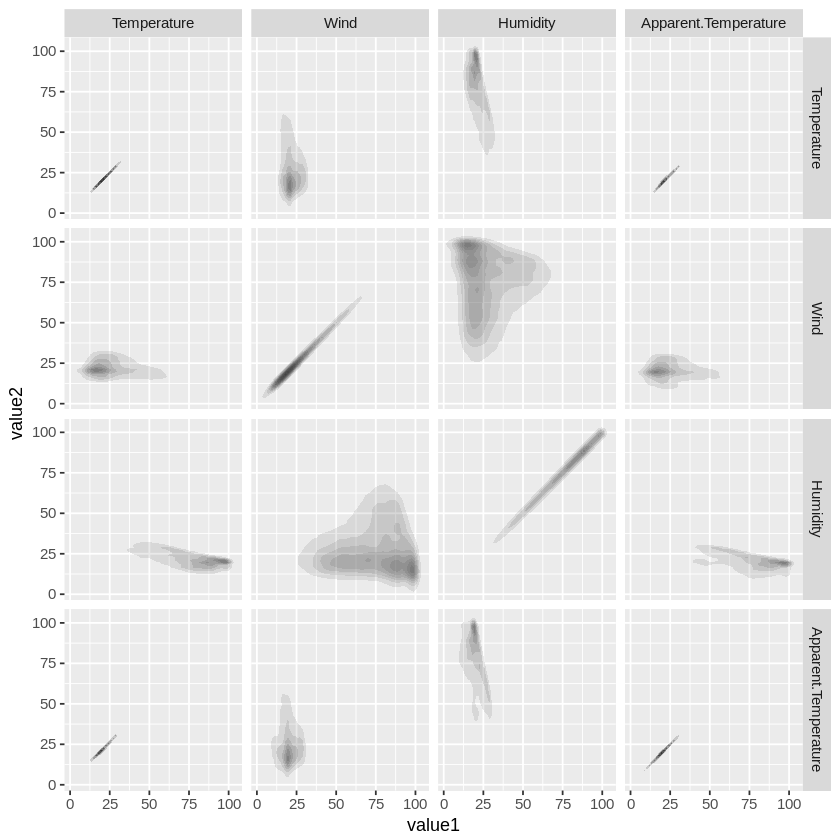

In [206]:
density.grid <- data.frame(var1=c(), value1=c(), var2=c(), value2=c())
for (var1 in correlation.attributes) {
    for (var2 in correlation.attributes) {
        df <- data.frame(var1=var1, value1=cepagri[[var1]], var2=var2, value2=cepagri[[var2]])
        density.grid <- rbind(density.grid, df)
    }
}

p <- ggplot(data=density.grid, aes(x=value1, y=value2))
p <- p + facet_grid(var1 ~ var2)
p <- p + stat_density2d(aes(alpha=..level..), geom="polygon")
p <- p + theme(legend.position="none")
p

Basically. I found that:
- Obviously, Temperature and Apparent temperature are highly correlated. To be honest, I expected something _very_ close to 1, but 0.9 is good enough (I really wish I knew how apparent temperature is calculated)
- Temperature and Wind are slightly negatively correlated. I suppose the wind helps taking the heat away.
- Apparent temperature is considerably more negatively correlated to wind than actual temperature. Here the wind effects are compunded: It lowers the actual temperature and it also makes us feel colder too.
- There is a significant negative correlation between humidity and temperature. My guess is that humidity is higher on rainy days, when the clouds block the sun and/or the rain cools the air.
- Interestingly, the effect of humidity on Apparent temperature is considerably smaller than on actual temperature. I guess that under higher humidity, our temperature control (sweat) doesn't work too well, giving us the feeling of higher temperature.
- Wind and Humidity are not correlated. (Interesting, since I expected both to increse simultaneously during storms)

Of course, the causalities I mentioned are just my guesses. I have no knowledge of how the weather actually works, and finding correlations doesn't imply finding causalities

![XKCD 552 - Correlation](https://imgs.xkcd.com/comics/correlation.png)


In [ ]:
fix.dst <- function(time) {
    #z <- 0
    for (i in 2:length(time)) {
        if (time[i] + 1800 < time[i - 1]) {
            #if (z == 0) {
                #print('----')
                #print(time[i-1])
            #}
            #z <- 2
            time[i] <- time[i] + 3600
        }
        #if (z > 0) {
            #print(time[i])
            #z <- z - 1
        #}
    }
    time
}

create_windows <- function(timestamps, seconds_before = 3600, seconds_after = 3600) {
    timestamps <- sort(timestamps)
    window_start <- timestamps - seconds_before
    window_end   <- timestamps + seconds_after
    
    # Merge adjacent windows
    window_valid <- logical(length(timestamps))
    prev_valid <- 1
    window_valid[1] <- T
    for (i in 2:length(timestamps)) {
        if (window_start[i] <= window_end[prev_valid]) {
            window_end[prev_valid] <- window_end[i]
        } else {
            prev_valid <- i
            window_valid[i] <- T
        }
    }
    
    data.frame(start = window_start[window_valid], end = window_end[window_valid])
}

get_window <- function(timestamp, windows) {
    ret <- rep(NA, length(timestamp))
    window_start <- windows$start
    window_end <- windows$end
    for (i in 1:length(timestamp)) {
        for (j in 1:length(window_start)) {
            if (timestamp[i] >= window_start[j] && timestamp[i] <= window_end[j] ) {
                ret[i] <- j
                break
            }
        }
    }
    ret
}

get_dataframe_window <- function(dataframe, windows) {
    dataframe$window <- get_window(dataframe$Time, windows)
    dataframe[ !is.na(dataframe$window), ]
}